In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [80]:
data = pd.read_csv("C:\\Users\\hr\\Downloads\\ML_Practice\\Practice-ML-Algorithms\\Linear-Regression\\Vehicle-Dataset\\car data.csv")

In [81]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [82]:
data.shape

(301, 9)

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
Car_Name         301 non-null object
Year             301 non-null int64
Selling_Price    301 non-null float64
Present_Price    301 non-null float64
Kms_Driven       301 non-null int64
Fuel_Type        301 non-null object
Seller_Type      301 non-null object
Transmission     301 non-null object
Owner            301 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [84]:
data['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [85]:
data['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [86]:
data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [87]:
data['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [88]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [89]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [90]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [91]:
new_data = data[['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [92]:
new_data.shape

(301, 9)

In [93]:
new_data['Current_Year'] = 2020

In [94]:
new_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [95]:
new_data['Age']=new_data['Current_Year']-new_data['Year']

In [96]:
new_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [97]:
new_data.drop(['Year'], axis=1, inplace=True)

In [98]:
new_data.drop(['Current_Year'], axis=1, inplace=True)

In [99]:
new_data.drop(['Car_Name'], axis=1, inplace=True)

In [100]:
new_data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [101]:
new_data = pd.get_dummies(new_data, drop_first=True)

In [102]:
new_data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [103]:
correlation = new_data.corr()
correlation

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


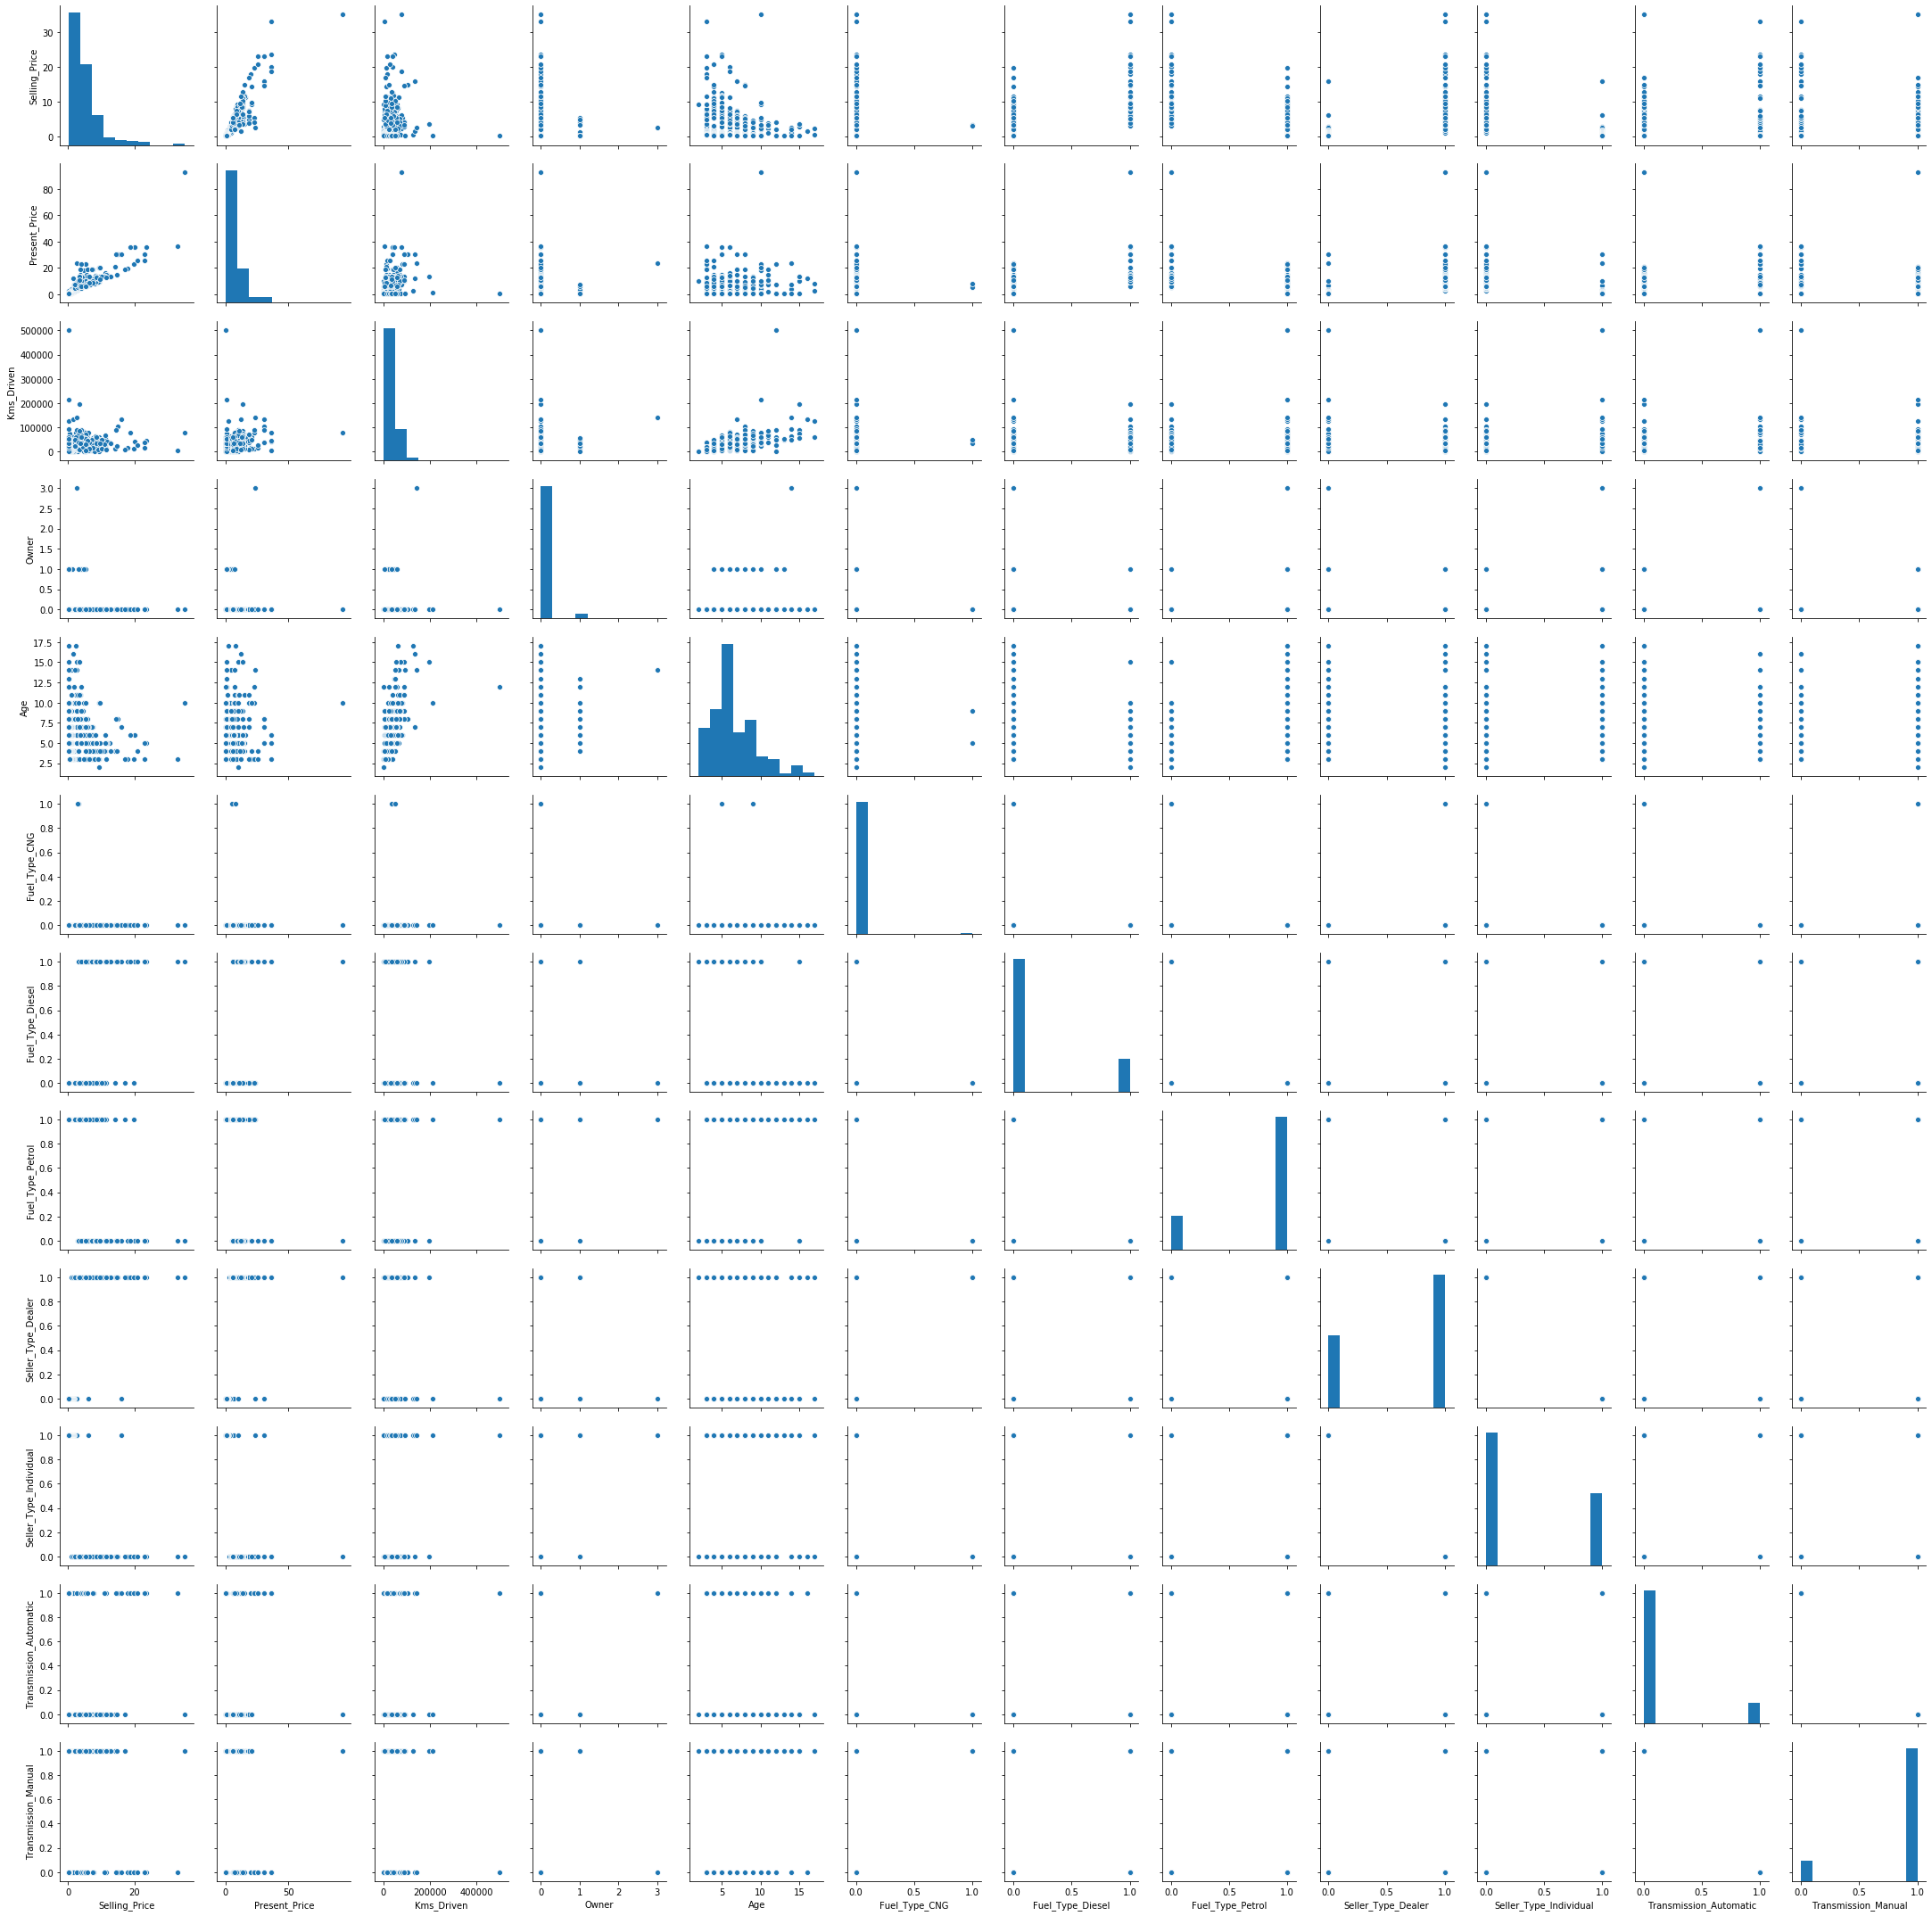

In [69]:
sns.pairplot(new_data)

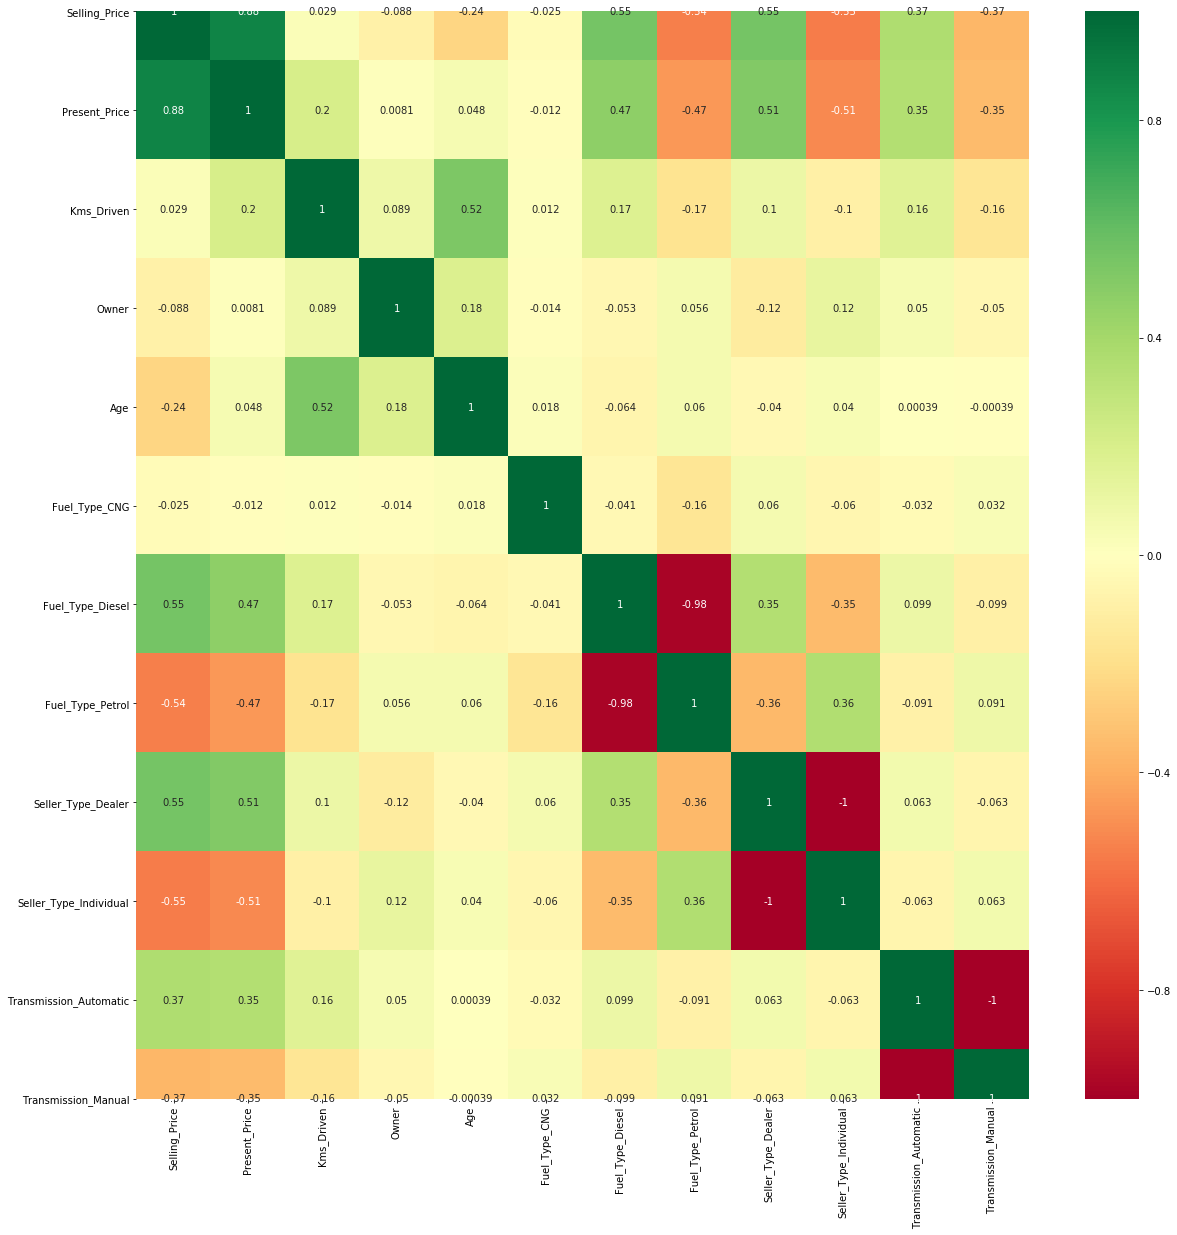

In [75]:
correlation = new_data.corr()
top_corr = correlation.index
plt.figure(figsize=(20,20))
g = sns.heatmap(correlation, annot=True, cmap='RdYlGn')

In [104]:
correlation.index

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Age',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

In [105]:
new_data.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Age',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

In [107]:
x = new_data.iloc[:,1:]
y = new_data.iloc[:,0]

In [108]:
x.head()

,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [109]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [110]:
# Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

C:\Users\hr\anaconda_new\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [111]:
model.feature_importances_

array([0.33318022, 0.03956627, 0.00058316, 0.07101723, 0.26046252,
       0.01261326, 0.10075129, 0.18182605])

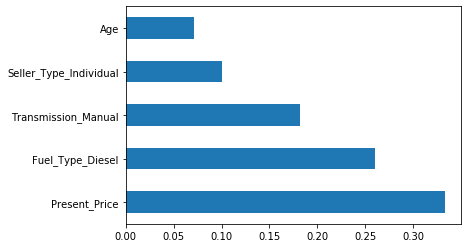

In [112]:
# Plot the Grpah ofFeature Importances for better visualizaton
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=50)

In [116]:
x_train.shape

(240, 8)

In [117]:
x_test.shape

(61, 8)

In [118]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()

In [119]:
## Hyperparameters
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [120]:
# Number of features to consider every split
max_features = ['auto','sqrt']

In [121]:
# Maximum number of levels in the tree
max_depth = [int(x) for x in np.linspace(start = 5, stop = 30, num=6)]
print(max_depth)

[5, 10, 15, 20, 25, 30]


In [123]:
# Minimum number of samples required to split the node
min_samples_split = [2,5,10,15,100]

In [124]:
# Minimum number of Samples at each leaf node
min_samples_leaf = [1,2,5,10]

In [125]:
from sklearn.model_selection import RandomizedSearchCV

In [129]:
# Create a Random Grid
random_grid = {'n_estimators': n_estimators,'max_features':max_features, 'max_depth':max_depth, 'min_samples_split':min_samples_split, 'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [131]:
rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions=random_grid, scoring = 'neg_mean_squared_error', n_iter=10, cv=5, verbose=2, random_state=45, n_jobs=1)

In [132]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.4s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.4s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.4s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.4s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.4s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=20, total=   1.4s
[CV] n_estimators=1200, min_samples_split=15, 

[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=300, min_samples_split=15

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   33.7s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [134]:
prediction = rf_random.predict(x_test)
prediction

array([ 2.93880972, 13.42802119,  2.63953433,  2.98593254,  1.40057579,
        0.80233265, 19.36053295,  0.28208597,  5.89146845, 10.24897496,
        3.04517288,  0.42002075,  8.26296759,  0.44872078,  0.46227377,
        0.53021794,  8.32380601,  0.5017448 ,  4.9829631 ,  7.1159273 ,
        5.93356865,  2.50293476,  7.42267331,  2.68361607,  0.26451425,
        0.61129615, 23.65378799,  4.4158797 ,  8.29937405,  6.30807558,
        1.09068266,  5.77018479,  1.17854458,  2.8012498 ,  5.71307321,
        6.24977263,  3.02525179,  4.52535   ,  5.0677623 ,  0.29351294,
        0.39666734,  7.46948814,  5.17262242,  2.61576944,  2.84141091,
        4.64475992,  5.90379155,  3.05100615,  3.3449873 ,  0.58911769,
        1.51214206,  2.66418909,  3.13022798,  2.50430143,  7.82260427,
        1.05276333, 14.99309381,  0.37410647,  3.06065655,  5.05703426,
        4.81172306])

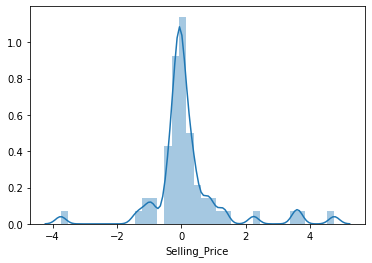

In [136]:
sns.distplot(y_test - prediction)

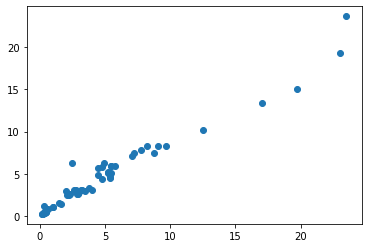

In [137]:
plt.scatter(y_test, prediction)

In [140]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [141]:
mean_absolute_error = mean_absolute_error(y_test, prediction)
mean_absolute_error

0.6151987703598768

In [142]:
mean_squared_error = mean_squared_error(y_test, prediction)
mean_squared_error

1.3529599821560043

In [143]:
R2_score = r2_score(y_test, prediction)
R2_score

0.9482477877410835

In [144]:
import pickle
file=open('random_forest_regression_model.pkl','wb')
pickle.dump(rf_random, file)